# **<div align="center"> <ins> Cryptography Project (CS352)</ins> </div>**
 ## <div align="center">Classification of Various Fake News Articles</div>
# **<ins> Name</ins>: Dheeraj Chaudhary**
# **<ins> Roll</ins>: 17BCS009**
 I have taken a dataset of Fake News Articles, which contains Fake news kept in rows, with various relevent columns, which we'll see later in the Analysis.
## <ins> Description of Dataset</ins>
>> The dataset contains various articles of fake News. This dataset was collected from realworld
sources; The fake news articles were collected from different sources like, from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics.

>> **PS**: The dataset contains Four columns, First is **title** which have titles of the article, second is **text** which have content/story of the article, Third is **subject**, to what category the article belong and the last column is **date** of posting of the article.

> **Name:** ISOT Fake News Dataset                       

> **Provider:** External Data Source

> **Host:** University of Victoria

### Using this dataset, I'll apply various **Machine Learning models** to get the best possible one, which can classify the fake news articles into various categories like, whether it belongs to *Political news* or *government news* etc. 


## Let's have a look at the model used and the accuracy achieved in each, along with some important terms used
* **Accuracy: (True Positive + True Negative) / Total Population**
    * Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.
    * True Positive: The number of correct predictions that the occurrence is positive
    * True Negative: The number of correct predictions that the occurrence is negative
* **F1-Score: (2 x Precision x Recall) / (Precision + Recall**
    * F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
* **Precision:** When a positive value is predicted, how often is the prediction correct?
* **Recall:** When the actual value is positive, how often is the prediction correct?

| **Model Name**  | **Accuracy** | **Precision**  | **F1-Score** |
| -------------   | -------------| -------------  | -------------|
| Multinomial Classifier     |      0.55    | 0.50           |       0.52   |
| XGB Classifier     |      0.62    | 0.59           |       0.60   |            
| Logistic Regression     |      0.64    | 0.62           |       0.62   |  
| Support Vector Machine     |      0.70    | 0.62           |       0.63   | 
| Gradient Boosting Classifier    |       0.70    | 0.66           |       0.65   |            
| Stochastic Gradient Descent     |      0.70    | 0.66           |       0.65   |            
           

>> ###  <span style="color:purple"> We can see last three models are giving same accuracy of 70%, which is best which I've achieved for the given dataset after applicying on various other techniques too</span>


> ## The Analysis is divided into three sections:
>> ### <ins> Part 1: Analysing Data</ins>
>> ### <ins> Part 2: Preprocessing on Data</ins>
>> ### <ins> Part 3: Implementing Machine Learning on the final Data</ins>



# **<div align="center"> <ins> Part 1: Analysing Data</ins> </div>**

## Now I will discuss the methods used for above mentioned model and Analyse the dataset

In [140]:
## importing the reuqired libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import seaborn as sns; sns.set()

## Load the dataset and print starting rows, along with describe the dataset in the next cell

In [141]:
df = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/Cryptography/Project/Fake.csv')
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [142]:
df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


## Printing all the unique category present in the dataset
> ### we can see all the 6 categories and number of articles belong to each corresponding category 

In [143]:
category = df['subject'].value_counts()
category
# plt.plot(category)

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

## Plotting Bar graph for categories of news articles

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


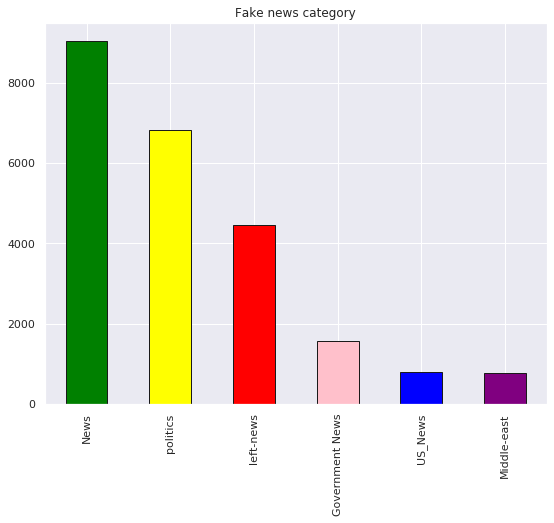

In [144]:

colors = ['green', 'yellow', 'red', 'pink', 'blue', 'purple' ]
df['subject'].value_counts().plot(kind='bar',figsize=(9, 7),edgecolor='k',title="Fake news category", colors = colors)
# plt.savefig('Sentiment_bar_plot.png', dpi=100)

## Ploting the plots for subject vs number of fake news 

Text(0.5, 1.0, 'Category vs number of fake news')

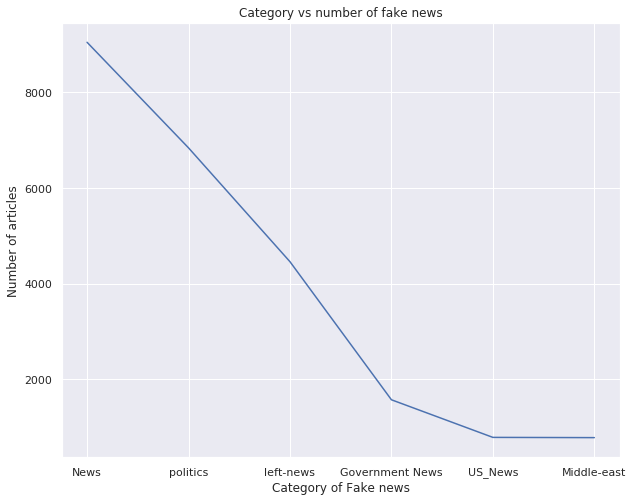

In [145]:
fig = plt.figure(figsize=(10,8))
category = df['subject'].value_counts()
# category
plt.plot(category)
plt.xlabel("Category of Fake news")
plt.ylabel("Number of articles")
plt.title('Category vs number of fake news')

## Ploting the plots for dates vs number of fake news starting from 2017 and back to 2015

In [ ]:
fig = plt.figure(figsize=(20,8))
dates = df['date'].value_counts()
# dates
plt.plot(dates)
plt.xlabel("Date of posting of Fake news")
plt.ylabel("Number of articles")
plt.title('Date of Posting vs number of Fake news')

Text(0.5, 1.0, 'Date of Posting vs number of Fake news')

# **<div align="center"> <ins> Part 2: Preprocessing on Data</ins> </div>**
## Since, we can see number of articles belongs to US_News and Middle-east  are very less comapred to other category. So, we need to discard it from our dataset.
>  To do this, we'll make a new column in the datset as, label. And assign all those articles a unique number which are not belong to US_News and Middle-east. So finally we'll see, in the label column that all corresponding value of these two discarded category will be *NA*.

In [ ]:
df["label"] = df['subject'].map({'News':0,
'politics' : 1,
'left-news': 2,
'Government News' : 3})

## Here finally we'll take the column which are required for our Machine Learning model.
> ### Taking the article **text** column which contains story of the Fake news and label column which we just have added in the dataset.

>> We'll also drop all those rows which have *NA* value in the label column, which refers that we are removing article belongs to US_News and Middle-east news category.

In [ ]:
model_data = pd.DataFrame()
model_data['text'] = df['text']
model_data['label'] = df['label']
model_data = model_data.dropna()
model_data['text']

## Some preprocessing in the *text* column so that it helps our model to understand the category of the news.

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer()
text_counts= cv.fit_transform(model_data['text'])

# **<div align="center"> <ins> Part 3: Implementing Machine Learning on the final Data</ins> </div>**


## Splitting the final dataset into train and test sets of 70:30, and printing the corresponding values 
## Here x is story/text column, and y is labels corresponding to each story category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, model_data['label'], test_size=0.30, shuffle=True, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## Prediction using Multinomial model

In [ ]:
multinomial_model = MultinomialNB().fit(X_train, y_train)
multinomial_model_predicted= multinomial_model.predict(X_test)


In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, multinomial_model_predicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,multinomial_model_predicted))

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = confusion_matrix(y_test,multinomial_model_predicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,multinomial_model_predicted))

## Prediction using XGBClassifier model


In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_model_predicted = xgb_model.predict(X_test)

In [ ]:
print("XGB Classification Accuracy: ",metrics.accuracy_score(y_test, xgb_model_predicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,xgb_model_predicted))

In [ ]:
uniform_data = confusion_matrix(y_test,xgb_model_predicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,xgb_model_predicted))

## Prediction using Logistic Regression model

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

In [ ]:
logistic_model_predicted = logistic_model.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test, logistic_model_predicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,logistic_model_predicted))

In [ ]:
uniform_data = confusion_matrix(y_test,logistic_model_predicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
uniform_data = confusion_matrix(y_test,xgb_model_predicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,logistic_model_predicted))

## Prediction using Gradient Boosting Classifier model

In [ ]:
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train, y_train)

In [ ]:
gradient_model_predicted = gradient_model.predict(X_test)

In [ ]:
print("Gradient Boosting classification Accuracy: ",metrics.accuracy_score(y_test, gradient_model_predicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,gradient_model_predicted))

In [ ]:
uniform_data = confusion_matrix(y_test,gradient_model_predicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,gradient_model_predicted))

## Prediction using Stochastic Gradient Descent model

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_modelpredicted = model4.predict(X_test)
print("Stochastic Gradient Descent: ",metrics.accuracy_score(y_test, sgd_modelpredicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,sgd_modelpredicted))

In [ ]:
uniform_data = confusion_matrix(y_test,sgd_modelpredicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,sgd_modelpredicted))

## Prediction using Logistic Support Vector Machine model

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_modelpredicted = svm_model.predict(X_test)
print("Support Vecto Machine: ",metrics.accuracy_score(y_test, svm_modelpredicted))

In [ ]:
print("confusion_matrix",confusion_matrix(y_test,svm_modelpredicted))

In [ ]:
uniform_data = confusion_matrix(y_test,svm_modelpredicted)
ax = sns.heatmap(uniform_data, annot=True, fmt="d")

In [ ]:
print("classification_report")
print(classification_report(y_test,svm_modelpredicted))


# **<div align="center"> <ins> Citations of the dataset</ins> </div>**

* Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text
classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley,
January/February 2018.
2. Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram
Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds)
Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments.
ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-
138